## Support Vector Classification

#### TL;DR

In [8]:
from sklearn.svm import SVC # Algorithm

In [9]:
ALG = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='auto_deprecated', 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None)
ALG

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 1. Example with code

In [10]:
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

# Load cleaned and preprocessed CSV file as a dataframe.
fp = os.path.join('', 'tweets_sentiment.csv')    # File path
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

<b>Example problem</b>: Predict tweet sentiment basing on it's  nr of hashtags, retweet and like counts. 

<b>Example data</b>: consists of 3800 tweets obtained by twitter search API on phrases like psychology + AI (and simillar) saved and cleaned previously as a tweets_sentiment.csv file. Features:

In [11]:
df.head(3)

,tweet,hashtags,hashtags_number,likes,retweets,sentiment,sentiment_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,2,0,7,0.2200,Positive
1,windy interview really groundbreaking can t wr...,interview groundbreaking. head DeepState reali...,6,0,3,0.2000,Positive
2,ai s top researchers think artificial general ...,ai’s ai artificialintelligence agi human,5,1,0,-0.0125,Negative


- <b>tweet</b>           - tweet text.
- <b>hashtags</b>        - #hashtags in a tweet.
- <b>hashtags_number</b> - number of hashtags.
- <b>likes</b>           - number of tweet likes 
- <b>retweets</b>        - number of times tweet have been shared.
- <b>sentiment</b>       - score in range: -1.0 to 1.0 .
- <b>sentiment_class</b> - score simplified to: Positive ( > 0) and Negative ( < 0).

<b>Example code:</b>

/home/luke/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy - train: 0.73
Accuracy - test:  0.7
First three predictions (of 950): ['Positive' 'Positive' 'Positive'] ...
First three propabilities (of 950): [[0.28986873 0.71013127]
 [0.28693432 0.71306568]
 [0.28987497 0.71012503]] ...


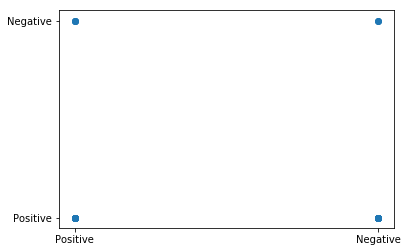

In [14]:
# Support Vector Classification

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Support Vector Classification.
SVMC = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='auto_deprecated', 
          coef0=0.0, 
          shrinking=True, 
          probability=True, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None)

# Fit data into model.
SVMC.fit(X_train, y_train)

# Results.
accuracy_train = round(SVMC.score(X_train, y_train), 2)
accuracy_test  = round(SVMC.score(X_test,  y_test), 2)
predictions = SVMC.predict(X_test) # an array.
probabilities = SVMC.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 2. Key info

- [ADD MORE],
- (To be updated.)

### 3. Template

In [ ]:
import os # Get file
import pandas as pd # Read as pandas table; dataframe (df).
from sklearn.model_selection import train_test_split # Train/Test set divide.
from sklearn.svm import SVC # Algorithm
import matplotlib.pyplot as plt # Plots

# You fill three lines below.
# ---------------------------
file_name   = 'your file_name.csv' # csv file in same dir  as this notebook.
predit_what = 'column_name' # The label to predict.
based_on    = ['column_name', 'column_name'] # The features to use in this quest.

# You may wany to change full file path / use existing dataframe. 
fp = os.path.join('', file_name) # fp = 'home/data/file_path.csv'
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # df = my_df 


# Support Vector Classification

# Divide data into features(X) and labels(y).
X =  df.loc[ :, based_on]    # features
y =  df.loc[ :, predit_what] # label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Support Vector Classification.
SVMC = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='auto_deprecated', 
          coef0=0.0, 
          shrinking=True, 
          probability=True, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None)

# Fit data into model.
SVMC.fit(X_train, y_train)

# Results.
accuracy_train = round(SVMC.score(X_train, y_train), 2)
accuracy_test  = round(SVMC.score(X_test,  y_test), 2)
predictions = SVMC.predict(X_test) # an array.
probabilities = SVMC.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### Concise

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

fp = os.path.join('', 'your file_name.csv')
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

X =  df.loc[ :, ['feature_column_name', 'feature_column_name']]
y =  df.loc[ :, 'label_column_name']
X_train, X_test, y_train, y_test = train_test_split(X, y)

SVMC = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='auto_deprecated', 
          coef0=0.0, 
          shrinking=True, 
          probability=True, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None).fit(X_train, y_train)

accuracy_train = round(SVMC.score(X_train, y_train), 2)
accuracy_test  = round(SVMC.score(X_test,  y_test), 2)
predictions = SVMC.predict(X_test)
probabilities = SVMC.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 4. More

To be updated.

By Luke, 13 II 2019.